In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Auxiliary Functions and Definitions
def f(x):
    return 1/np.cosh(np.log(x)/2.403)
def delta_f(x, delta_x):
    const = 0.416146
    return np.abs( -const * np.tanh(const*x) * 1/np.cosh(const*x) ) * delta_x
voltage_error = 0.5E-7
current_error = 0.5E-7
magnetic_error = 0.5E-7
depth_error = 0.01E-3

In [79]:
#Primary Result Functions
def resistivity_werr(V_adjs, I_adjs, sample_depth=1.25E-3):
    R_adjs = V_adjs/I_adjs
    delta_R_adjs = np.abs(R_adjs) * np.sqrt( np.power(voltage_error/V_adjs,2) +  np.power(current_error/I_adjs,2))
    
    R_adj1 = (R_adjs[:,0] + R_adjs[:,2])/2
    R_adj2 = (R_adjs[:,1] + R_adjs[:,3])/2
    delta_R_adj1 = np.sqrt( np.power(delta_R_adjs[:,0],2) + np.power(delta_R_adjs[:,1],2) )/2
    delta_R_adj2 = np.sqrt( np.power(delta_R_adjs[:,1],2) + np.power(delta_R_adjs[:,3],2) )/2

    x = R_adj1/R_adj2
    delta_x = np.abs(x) * np.sqrt( np.power(delta_R_adj1/R_adj1,2) + np.power(delta_R_adj2/R_adj2,2) )
    shape_factor = f(x)
    shape_error = delta_f(x, delta_x)
    
    R_avg = (R_adj1 + R_adj2)/2
    delta_R_avg = np.sqrt( np.power(delta_R_adj1,2) + np.power(delta_R_adj2,2) )/2
    
    resistivity = (np.pi*sample_depth/np.log(2)) * (R_adj1+R_adj2)/2 * f(R_adj1/R_adj2)
    error = np.abs(resistivity) * np.sqrt( np.power(depth_error/sample_depth,2) + np.power(delta_R_avg/R_avg,2) + np.power(shape_error/shape_factor,2) )
    
    return (resistivity,error)

def hall_coef_werr(V_diags, I_diags, magnetic_field, sample_depth=1.25E-3):
    R_diags = V_diags/I_diags
    delta_R_diags = np.abs(R_diags) * np.sqrt( np.power(voltage_error/V_diags,2) +  np.power(current_error/I_diags,2))
    
    R_avg = (R_diags[:,0] + R_diags[:,1] + R_diags[:,2] + R_diags[:,3])/4
    delta_R_avg = np.sqrt(np.power(delta_R_diags[:,0],2) + np.power(delta_R_diags[:,1],2) + np.power(delta_R_diags[:,2],2) + np.power(delta_R_diags[:,3],2))/4
                          
    hall_coef = (sample_depth*R_avg) / magnetic_field
    error = np.abs(hall_coef) * np.sqrt( np.power(depth_error/sample_depth,2) + np.power(delta_R_avg/R_avg,2) + np.power(magnetic_error/magnetic_field,2) )
    
    
    return (hall_coef, error)

In [80]:
data_file_path1 = r"C:\Users\supra\Desktop\Physics 111B\SHE Lab\suprav-elias-data-1e4-amps.txt"
data1 = pd.read_table(data_file_path1, header=2)

data_file_path2 = r"C:\Users\supra\Desktop\Physics 111B\SHE Lab\suprav-elias-50e-6.txt"
data2 = pd.read_table(data_file_path2, header=2)

data_file_path3 = r"C:\Users\supra\Desktop\Physics 111B\SHE Lab\suprav-elias-25e-6.txt"
data3 = pd.read_table(data_file_path3, header=2)

data_file_path4 = r"C:\Users\supra\Desktop\Physics 111B\SHE Lab\suprav-elias-1e-5.txt"
data4 = pd.read_table(data_file_path4, header=2)

data_file_path5 = r"C:\Users\supra\Desktop\Physics 111B\SHE Lab\suprav-elias-data-1e-6amps.txt"
data5 = pd.read_table(data_file_path5, header=2)

In [81]:
dataBplus1 = data1[data1["B-Field (Gauss)"] > 3000]
dataBminus1 = data1[data1["B-Field (Gauss)"] < -3000]
dataBzero1 = data1[(data1["B-Field (Gauss)"] < 500) & (data1["B-Field (Gauss)"] > -500)]

dataBplus2 = data2[data2["B-Field (Gauss)"] > 3000]
dataBminus2 = data2[data2["B-Field (Gauss)"] < -3000]
dataBzero2 = data2[(data2["B-Field (Gauss)"] < 500) & (data2["B-Field (Gauss)"] > -500)]

dataBplus3 = data3[data3["B-Field (Gauss)"] > 3000]
dataBminus3 = data3[data3["B-Field (Gauss)"] < -3000]
dataBzero3 = data3[(data3["B-Field (Gauss)"] < 500) & (data3["B-Field (Gauss)"] > -500)]

dataBplus4 = data4[data4["B-Field (Gauss)"] > 3000]
dataBminus4 = data4[data4["B-Field (Gauss)"] < -3000]
dataBzero4 = data4[(data4["B-Field (Gauss)"] < 500) & (data4["B-Field (Gauss)"] > -500)]

dataBplus5 = data5[data5["B-Field (Gauss)"] > 3000]
dataBminus5 = data5[data5["B-Field (Gauss)"] < -3000]
dataBzero5 = data5[(data5["B-Field (Gauss)"] < 500) & (data5["B-Field (Gauss)"] > -500)]

dataBplusall = pd.concat([dataBplus1, dataBplus2, dataBplus3, dataBplus4, dataBplus5])
dataBminusall = pd.concat([dataBminus1, dataBminus2, dataBminus3, dataBminus4, dataBminus5])
dataBzeroall = pd.concat([dataBzero1, dataBzero2, dataBzero3, dataBzero4, dataBzero5])

dataBplusgood = pd.concat([dataBplus1, dataBplus2, dataBplus3, dataBplus4])
dataBminusgood = pd.concat([dataBminus1, dataBminus2, dataBminus3, dataBminus4])
dataBzerogood = pd.concat([dataBzero1, dataBzero2, dataBzero3, dataBzero4])

In [82]:
# Define new splices from the dataset
# For + magnetic field
V_adjs_plus1 = dataBplus1[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_plus1 = dataBplus1[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_plus1 = dataBplus1[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_plus1 = dataBplus1[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_plus2 = dataBplus2[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_plus2 = dataBplus2[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_plus2 = dataBplus2[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_plus2 = dataBplus2[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_plus3 = dataBplus3[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_plus3 = dataBplus3[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_plus3 = dataBplus3[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_plus3 = dataBplus3[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_plus4 = dataBplus4[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_plus4 = dataBplus4[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_plus4 = dataBplus4[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_plus4 = dataBplus4[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_plus5 = dataBplus5[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_plus5 = dataBplus5[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_plus5 = dataBplus5[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_plus5 = dataBplus5[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_plusall = dataBplusall[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_plusall = dataBplusall[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_plusall = dataBplusall[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_plusall = dataBplusall[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_plusgood = dataBplusgood[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_plusgood = dataBplusgood[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_plusgood = dataBplusgood[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_plusgood = dataBplusgood[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

# For 0 magnetic field
V_adjs_zero1 = dataBzero1[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_zero1 = dataBzero1[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_zero1 = dataBzero1[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_zero1 = dataBzero1[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_zeroall = dataBzeroall[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_zeroall = dataBzeroall[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_zeroall = dataBzeroall[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_zeroall = dataBzeroall[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_zerogood = dataBzerogood[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_zerogood = dataBzerogood[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_zerogood = dataBzerogood[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_zerogood = dataBzerogood[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

# For - magnetic field
V_adjs_minus1 = dataBminus1[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_minus1 = dataBminus1[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_minus1 = dataBminus1[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_minus1 = dataBminus1[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_minusall = dataBminusall[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_minusall = dataBminusall[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_minusall = dataBminusall[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_minusall = dataBminusall[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

V_adjs_minusgood = dataBminusgood[["Voltage DC", "Voltage BC", "Voltage -DC", "Voltage -BC"]].to_numpy()
I_adjs_minusgood = dataBminusgood[["sample I AB", "sample I AD", "sample I -AB", "sample I -AD"]].to_numpy()
V_diags_minusgood = dataBminusgood[["Voltage BD", "Voltage AC", "Voltage -BD", "Voltage -AC"]].to_numpy()
I_diags_minusgood = dataBminusgood[["sample I AC", "sample I BD", "sample I -AC", "sample I -BD"]].to_numpy()

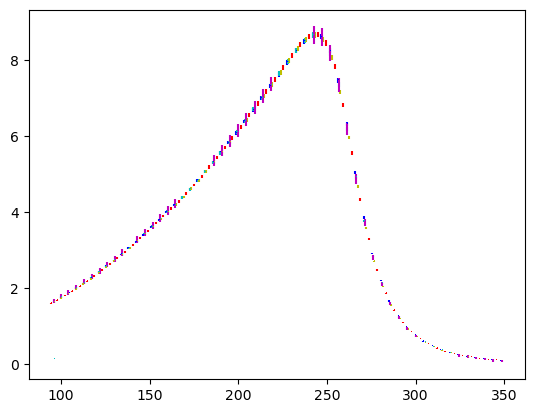

In [83]:
plt.errorbar(dataBplus1["Temperature (K)"], resistivity_werr(V_adjs_plus1, I_adjs_plus1)[0], yerr=resistivity_werr(V_adjs_plus1, I_adjs_plus1)[1], color='b', fmt=',')
plt.errorbar(dataBplus2["Temperature (K)"], resistivity_werr(V_adjs_plus2, I_adjs_plus2)[0], yerr=resistivity_werr(V_adjs_plus2, I_adjs_plus2)[1], color='r', fmt=',')
plt.errorbar(dataBplus3["Temperature (K)"], resistivity_werr(V_adjs_plus3, I_adjs_plus3)[0], yerr=resistivity_werr(V_adjs_plus3, I_adjs_plus3)[1], color='c', fmt=',')
plt.errorbar(dataBplus4["Temperature (K)"], resistivity_werr(V_adjs_plus4, I_adjs_plus4)[0], yerr=resistivity_werr(V_adjs_plus4, I_adjs_plus4)[1], color='y', fmt=',')
plt.errorbar(dataBplus5["Temperature (K)"], resistivity_werr(V_adjs_plus5, I_adjs_plus5)[0], yerr=resistivity_werr(V_adjs_plus5, I_adjs_plus5)[1], color='m', fmt=',')
plt.show()

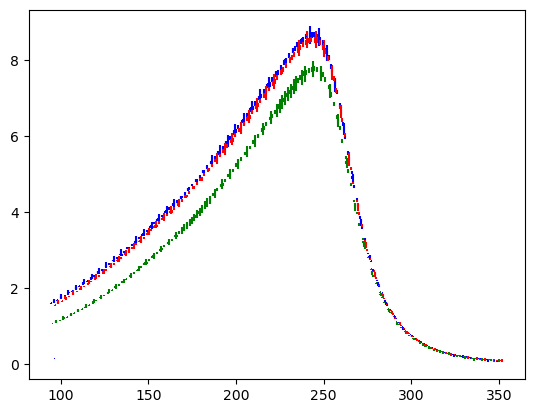

In [84]:
plt.errorbar(dataBplusall["Temperature (K)"], resistivity_werr(V_adjs_plusall, I_adjs_plusall)[0], yerr=resistivity_werr(V_adjs_plusall, I_adjs_plusall)[1], color='b', fmt=',')
plt.errorbar(dataBzeroall["Temperature (K)"], resistivity_werr(V_adjs_zeroall, I_adjs_zeroall)[0], yerr=resistivity_werr(V_adjs_zeroall, I_adjs_zeroall)[1], color='g', fmt=',')
plt.errorbar(dataBminusall["Temperature (K)"], resistivity_werr(V_adjs_minusall, I_adjs_minusall)[0], yerr=resistivity_werr(V_adjs_minusall, I_adjs_minusall)[1], color='r', fmt=',')
plt.show()

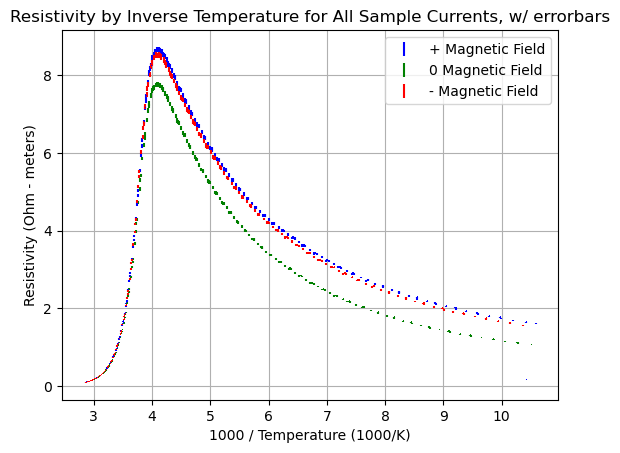

In [85]:
plt.errorbar(1000/dataBplusgood["Temperature (K)"], resistivity_werr(V_adjs_plusgood, I_adjs_plusgood)[0], yerr=resistivity_werr(V_adjs_plusgood, I_adjs_plusgood)[1], color='b', fmt=',', label="+ Magnetic Field")
plt.errorbar(1000/dataBzerogood["Temperature (K)"], resistivity_werr(V_adjs_zerogood, I_adjs_zerogood)[0], yerr=resistivity_werr(V_adjs_zerogood, I_adjs_zerogood)[1], color='g', fmt=',', label='0 Magnetic Field')
plt.errorbar(1000/dataBminusgood["Temperature (K)"], resistivity_werr(V_adjs_minusgood, I_adjs_minusgood)[0], yerr=resistivity_werr(V_adjs_minusgood, I_adjs_minusgood)[1], color='r', fmt=',', label="- Magnetic Field")
plt.title("Resistivity by Inverse Temperature for All Sample Currents, w/ errorbars")
plt.xlabel("1000 / Temperature (1000/K)")
plt.ylabel("Resistivity (Ohm - meters)")
#plt.xlim([2,12])
plt.legend()
plt.grid()
plt.show()

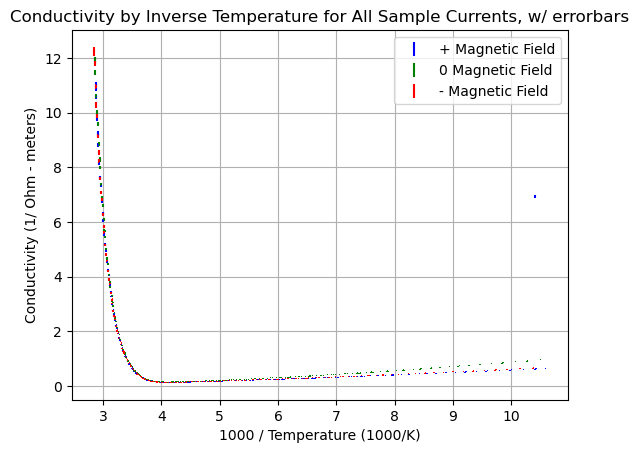

In [92]:
res_plus, delta_resplus = resistivity_werr(V_adjs_plusgood, I_adjs_plusgood)
res_zero, delta_reszero = resistivity_werr(V_adjs_zerogood, I_adjs_zerogood)
res_minus, delta_resminus = resistivity_werr(V_adjs_minusgood, I_adjs_minusgood)


plt.errorbar(1000/dataBplusgood["Temperature (K)"], 1/res_plus, yerr=delta_resplus/np.power(res_plus,2), color='b', fmt=',', label="+ Magnetic Field")
plt.errorbar(1000/dataBzerogood["Temperature (K)"], 1/res_zero, yerr=delta_reszero/np.power(res_zero,2), color='g', fmt=',', label='0 Magnetic Field')
plt.errorbar(1000/dataBminusgood["Temperature (K)"], 1/res_minus, yerr=delta_resminus/np.power(res_minus,2), color='r', fmt=',', label="- Magnetic Field")

plt.title("Conductivity by Inverse Temperature for All Sample Currents, w/ errorbars")
plt.xlabel("1000 / Temperature (1000/K)")
plt.ylabel("Conductivity (1/ Ohm - meters)")
plt.legend()
plt.grid()
plt.show()

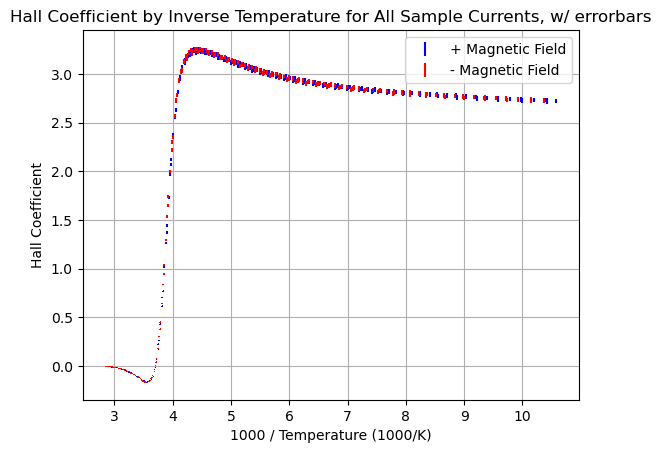

In [100]:
#plt.scatter(1000/dataBplusgood["Temperature (K)"], hall_coef_werr(V_diags_plusgood, I_diags_plusgood, dataBplusgood["B-Field (Gauss)"].to_numpy()/10000)[0], color='b', marker='.', label="+ Magnetic Field")
#plt.scatter(1000/dataBminusgood["Temperature (K)"], hall_coef_werr(V_diags_minusgood, I_diags_minusgood, dataBminusgood["B-Field (Gauss)"].to_numpy()/10000)[0], color='r', marker='.', label="- Magnetic Field")
plt.errorbar(1000/dataBplusgood["Temperature (K)"], hall_coef_werr(V_diags_plusgood, I_diags_plusgood, dataBplusgood["B-Field (Gauss)"].to_numpy()/10000)[0], yerr=hall_coef_werr(V_diags_plusgood, I_diags_plusgood, dataBplusgood["B-Field (Gauss)"].to_numpy()/10000)[1], color='b', fmt=',', label="+ Magnetic Field")
plt.errorbar(1000/dataBminusgood["Temperature (K)"], hall_coef_werr(V_diags_minusgood, I_diags_minusgood, dataBminusgood["B-Field (Gauss)"].to_numpy()/10000)[0], yerr=hall_coef_werr(V_diags_minusgood, I_diags_minusgood, dataBminusgood["B-Field (Gauss)"].to_numpy()/10000)[1] , color='r', fmt=',', label="- Magnetic Field")
plt.title("Hall Coefficient by Inverse Temperature for All Sample Currents, w/ errorbars")
plt.xlabel("1000 / Temperature (1000/K)")
plt.ylabel("Hall Coefficient")
plt.legend()
plt.grid()
plt.show()

In [ ]:
R_h, delta_R_h = hall_coef_werr(V_diags_plusgood, I_diags_plusgood, dataBplusgood["B-Field (Gauss)"].to_numpy()/10000)

